24,734,0.19
25,516,0.12
31,754,0.15
31,877,0.16
22,814,0.14
21,362,0.06
26,764,0.13
20,809,0.13
16,223,0.03
22,1066,0.15


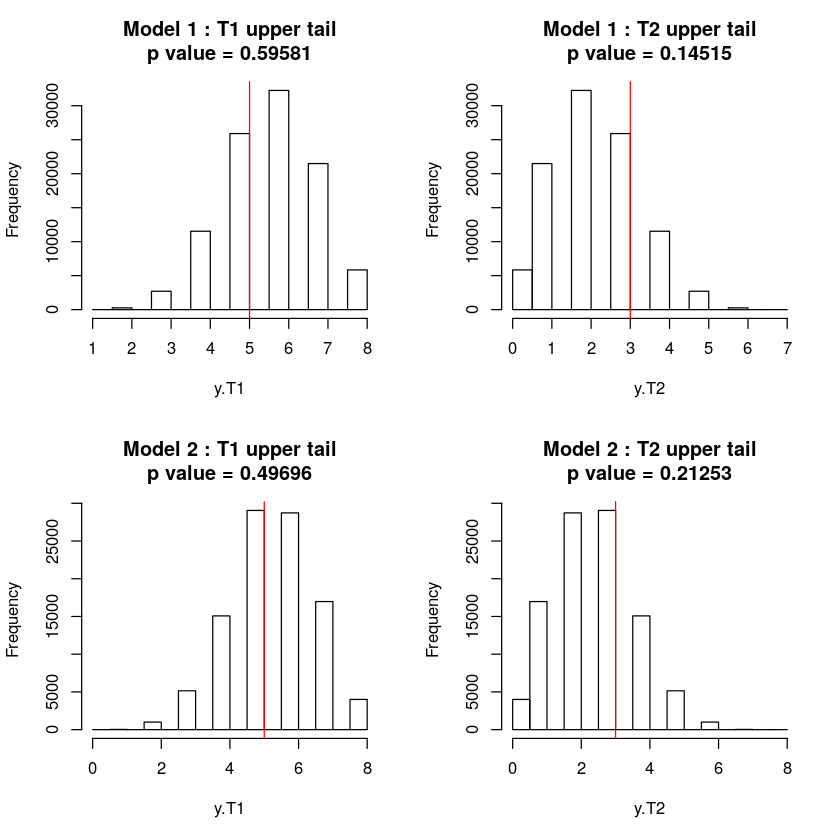

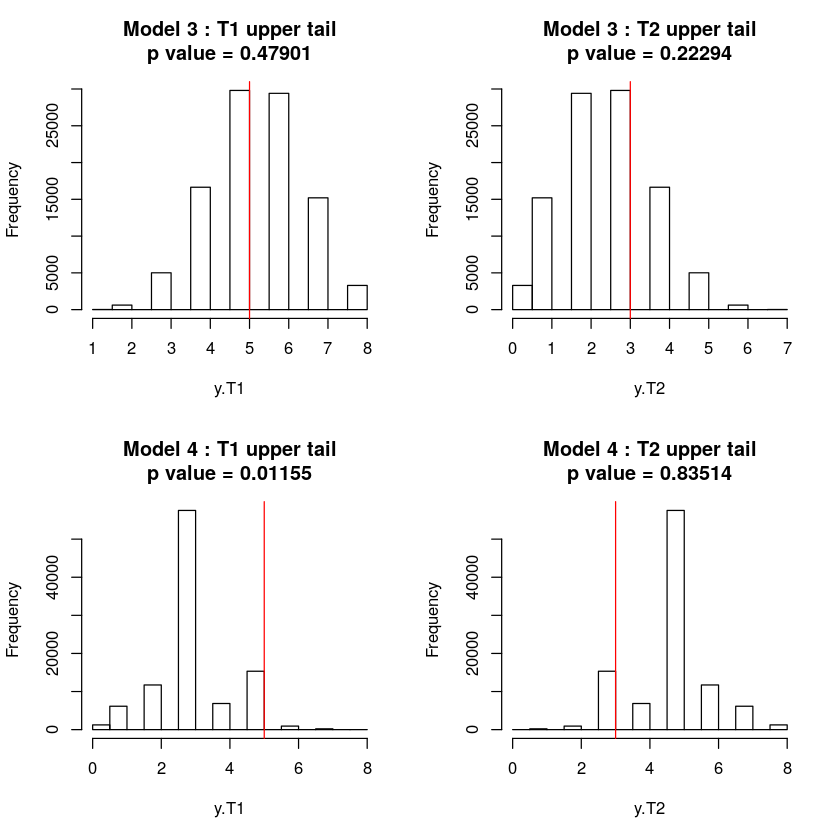

In [8]:
(y <- matrix(c(24,25,31,31,22,21,26,20,16,22,734,516,754,877,814,362,764,809,223,1066,0.19,0.12,0.15,0.16,0.14,0.06,0.13,0.13,0.03,0.15),ncol = 3))
y_origin <- y
# simulation
T1 <- function(y){
  m <- length(y)
  z <- sign(y[2:m]-y[1:m-1])
  m <- length(z)
  return(sum(z[2:m]!=z[1:m-1]))
}

T2 <- function(y){
  m <- length(y)
  z <- sign(y[2:m]-y[1:m-1])
  m <- length(z)
  return(sum(z[2:m]==z[1:m-1]))
}
# T1 <- function(y){
#   mean(y)
# }
# T1 <- function(y){
#   max(y)-min(y)
# }

sim <- function(alpha, beta, y_orig, x=rep(1,10), i = 1){
  S <- 100000
  feature <- 10
  y <- rep(NA,S*feature)
  dim(y) <- c(feature,S)
  for(s in 1:S){
  theta <- rgamma(1,shape = alpha,rate = beta)
  y[,s] <- rpois(10,x*theta)
  }
  y.T1 <- apply(y, 2, T1)
  y.T2 <- apply(y, 2, T2)
  
  y_orig.T1 <- T1(y_orig)
  y_orig.T2 <- T2(y_orig)
  

  hist(y.T1, main = paste("Model",i,":","T1 upper tail\np value =",sum(y_orig.T1<y.T1)/S))
  abline(v = y_orig.T1,col = "red")
  
  hist(y.T2, main = paste("Model",i,":","T2 upper tail\np value =",sum(y_orig.T2<y.T2)/S))
  abline(v = y_orig.T2,col = "red")
}
par(mfrow=c(2,2))
# Model 1
sim(sum(y_origin[,1]),10,y_origin[,1],i = 1)

# Model 2
x <- y_origin[,2]/y_origin[,3]*1e6
sim(sum(y_origin[,1]),sum(x), y_origin[,1], x, i = 2)

# Model 3
sim(sum(y_origin[,2]),10,y_origin[,2],i = 3)

# Model 4
sim(sum(y_origin[,2]),sum(x),y_origin[,2], x, i = 4)